# Analysis of Storks Data

## Aims and outline:

The aim of this report is to complete two analyses, each producing two models, for the storks dataset. Section 1 begins by introducing and preparing the dataset. The first analysis, in section 2, will implement two regression models for the number of births. The second analysis, in section 3, will implement two regression models for the number of storks. The bootstrap technique will be used in section 2 and section 3 to estimate the distribution of differences in the R2 and root mean squared error (RMSE) parameters respectively.

1. Section 1: Data Preparation
    1. Introducing the Dataset
    1. Exploring the Dataset

2. Section 2: Regression Modelling for the Number of Births
    1. Implementing Model 1
    1. Implementing Model 2
    1. Using Bootstrap for R2 Differences

3. Section 3: Regression Modelling for the Number of Storks
    1. Implementing Model 1
    1. Implementing Model 2
    1. Using Bootstrap for RMSE Differences

## Section 1: Data Preparation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
%matplotlib inline

### Section 1.1: Introducing the Dataset

The Storks dataset is taken from the paper *Robert Matthews. “Storks Deliver Babies (p = 0.008)”. Teaching Statistics. Volume 22, Number 2, Summer 2000, p36-8*.

The dataset contains the following variables:

| Variable            | Description                           |
| ------------------- | ------------------------------------- |
| Country             | The country for a particular instance |
| Area                | The land area (km$^2$)                |
| Storks              | The number of stork breeding pairs    |
| Humans              | The number of humans (10$^6$)         |
| BirthRate           | The birth rate (10$^3$/yr)            |
| SuitableAreaPercent | The land area suitable for storks (%) |

### Section 1.2: Exploring the Dataset

The storks dataset is read into a data frame named `storks`.

In [2]:
storks = pd.read_csv('storks.csv', dtype={'Country':'category'})
storks

,Country,Area,Storks,Humans,BirthRate,SuitableAreaPercent
0,Albania,28750,100,3.2,83,55.68
1,Austria,83860,300,7.6,87,38.34
2,Belgium,30520,1,9.9,118,65.93
3,Bulgaria,111000,5000,9.0,117,57.99
4,Denmark,43100,9,5.1,59,81.46
5,France,544000,140,56.0,774,58.47
6,Germany,357000,3300,78.0,901,59.81
7,Greece,132000,2500,10.0,106,47.31
8,Holland,41900,4,15.0,188,70.96
9,Hungary,93000,5000,11.0,124,75.86


In [3]:
storks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Country              17 non-null     category
 1   Area                 17 non-null     int64   
 2   Storks               17 non-null     int64   
 3   Humans               17 non-null     float64 
 4   BirthRate            17 non-null     int64   
 5   SuitableAreaPercent  17 non-null     float64 
dtypes: category(1), float64(2), int64(3)
memory usage: 961.0 bytes


A scatterplot matrix and correlation matrix are calculated to explore the data distributions and correlations.

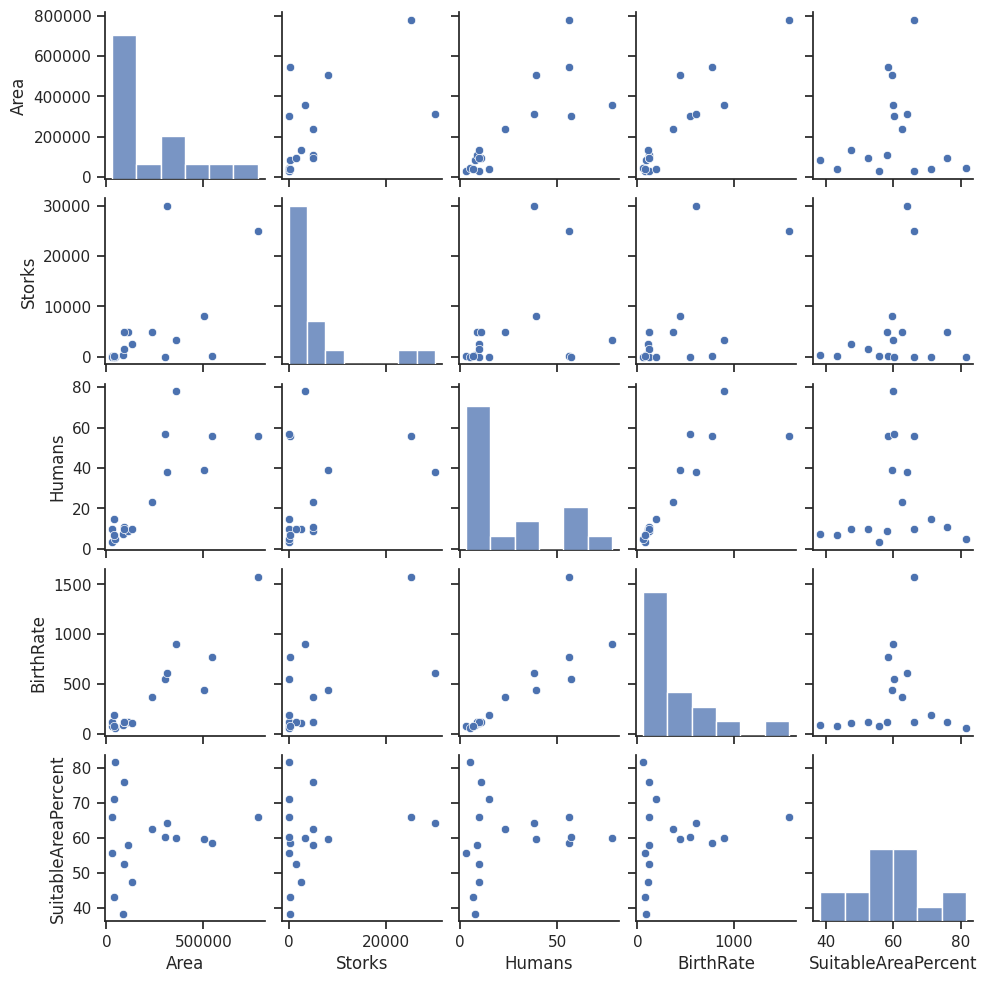

In [4]:
sns.set_theme(style='ticks')
sns.pairplot(storks, height=2)
plt.show()

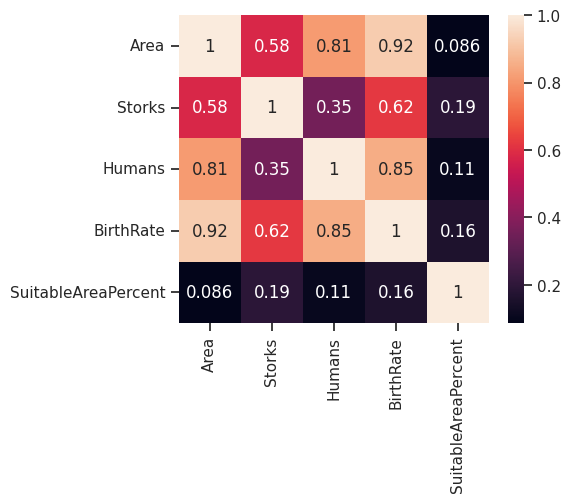

In [5]:
corr = storks.corr(numeric_only=True)
fig, ax = plt.subplots(figsize=(5,4))
sns.heatmap(corr, annot=True, ax=ax)
plt.show()

The scatter matrix shows most variables having a significant positive skew. This is acceptable for the purposes of regression modelling. The highest correlation is between birth rate and area.

## Section 2: Regression Modelling for the Number of Births

Two models will be implemented in this section to predict the number of births. The first model in this section will use `Storks` as the predictor. The second model in this section will use `Humans` as the predictor.

### Section 2.1: Implementing Model 1

The first regression model is implemented below.

In [6]:
y = storks.BirthRate
X = np.array([storks.Storks])
X = np.transpose(X)
reg = LinearRegression().fit(X, y)
print('The R2 coefficient of determination is %4.3f and R is %4.3f' %
      (reg.score(X, y), np.sqrt(reg.score(X, y))))
print('The intercept is %4.1f' % reg.intercept_)
beta_Storks = reg.coef_
print('The regression coefficient (slope) for Storks is %.3f' % beta_Storks, 'change of birth rate (10^3 per year) per stork pair.')

The R2 coefficient of determination is 0.385 and R is 0.620
The intercept is 225.0
The regression coefficient (slope) for Storks is 0.029 change of birth rate (10^3 per year) per stork pair.


A scatter graph is plotted for the actual birth rate values against the models predicted birth rate values.

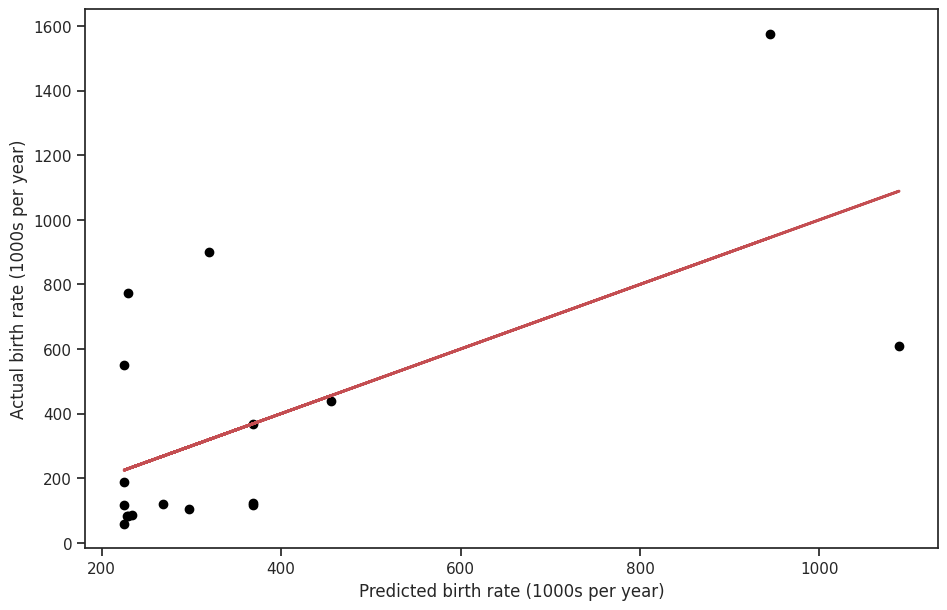

In [7]:
y_hat = reg.predict(X)

fig, a = plt.subplots(1,1,figsize=(11,7))
a.set_xlabel('Predicted birth rate (1000s per year)')
a.set_ylabel('Actual birth rate (1000s per year)')
a.scatter(y_hat, y, color='black')
a.plot(y_hat, y_hat, color='r', linewidth=2)
plt.show()

The red line shows the actual birth rate. The predicted birth rate is seen to roughly follow this line. The R2 coefficient of determination of 0.385 suggests there is agreement between predictions and observations but it is not a particularly close fit.

### Section 2.2: Implementing Model 2

The second model will now be implemented below, using the population size, `Humans` as the predictor.

In [8]:
X = np.array([storks.Humans])
X = np.transpose(X)
reg = LinearRegression().fit(X, y)
print('The R2 coefficient of determination is %4.3f and R is %4.3f' %
      (reg.score(X, y), np.sqrt(reg.score(X, y))))
print('The intercept is %4.1f' % reg.intercept_)
beta_Humans = reg.coef_
print("The regression coefficient (slope) for Humans is %.3f" % beta_Humans, "change of birth rate (10^3 per year) per 10^6 humans.")

The R2 coefficient of determination is 0.725 and R is 0.851
The intercept is -8.4
The regression coefficient (slope) for Humans is 14.834 change of birth rate (10^3 per year) per 10^6 humans.


Another scatter graph can now be plotted to compare predictions and actual birth rates for this regression model.

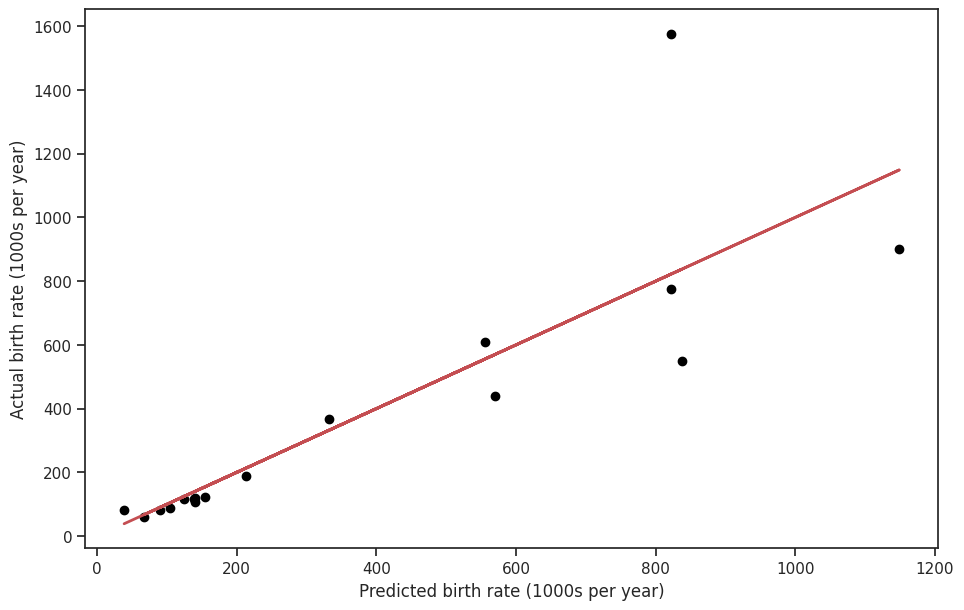

In [9]:
y_hat = reg.predict(X)

fig, a = plt.subplots(1,1,figsize=(11,7))
a.set_xlabel('Predicted birth rate (1000s per year)')
a.set_ylabel('Actual birth rate (1000s per year)')
a.scatter(y_hat, y, color='black')
a.plot(y_hat, y_hat, color='r', linewidth=2)
plt.show()

In this model, the predicted birth rate matches the actual birth rate much more closely. This is confirmed with a much higher R2 coefficient of determination of 0.725. These results are expected since the higher population size is expected to have more births each year.

### Section 2.3: Using Bootstrap for R2 Differences

In [10]:
import scipy.stats as stats
from sklearn.utils import resample

A bootstrap function is defined below, as well as a regression function which will calculate the R2 differences for each bootstrap sample. A distribution of these differences is then plotted.

In [11]:
def bootstrapC(data, cols, repeats, func):
    result = pd.DataFrame(data = dict([(c, np.empty(repeats)) for c in cols]))

    for i in range(0, repeats):
        result.iloc[i] = func(resample(data))
    return result

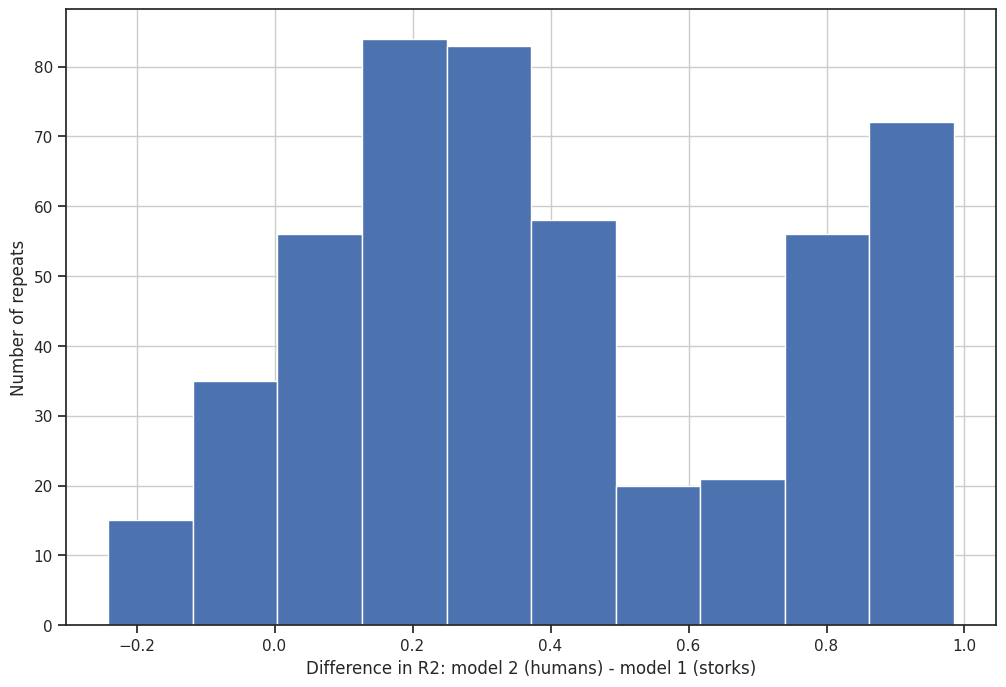

In [12]:
def regression(df):
    y = df.BirthRate

    # model 1
    X1 = np.array([df.Storks])
    X1 = np.transpose(X1)
    reg1 = LinearRegression().fit(X1, y)

    # model 2
    X2 = np.array([df.Humans])
    X2 = np.transpose(X2)
    reg2 = LinearRegression().fit(X2, y)

    difference = reg2.score(X2, y) - reg1.score(X1, y)
    return difference

fig, a1 = plt.subplots(figsize=(12,8))
bstrap = bootstrapC(storks, ['R2Difference'], 500, regression)
bstrap.hist(ax=a1)
a1.set_xlabel('Difference in R2: model 2 (humans) - model 1 (storks)')
a1.set_ylabel('Number of repeats')
a1.set_title('')
plt.show()

From these results, we can be confident that model 2 is able to explain more of the variability in the number of births than model 1. This is because the differences in R2 (model 2 - model 1) are nearly always positive, meaning the R2 value for model 2 is nearly always higher. If the models performed similarly then the distribution of differences would be centered around 0.


The confidence intervals are estimated:

In [13]:
R2_diff = regression(storks)

print("The difference between the R2 coefficient of determination (model 2 - model 1) is %3.2f, with 80%% CI from %3.2f to %3.2f" %
       (R2_diff, bstrap.R2Difference.quantile(0.1), bstrap.R2Difference.quantile(0.9)))
print("The difference between the R2 coefficient of determination (model 2 - model 1) is %3.2f, with 90%% CI from %3.2f to %3.2f" %
       (R2_diff, bstrap.R2Difference.quantile(0.05), bstrap.R2Difference.quantile(0.95)))
print("The difference between the R2 coefficient of determination (model 2 - model 1) is %3.2f, with 99%% CI from %3.2f to %3.2f" %
       (R2_diff, bstrap.R2Difference.quantile(0.005), bstrap.R2Difference.quantile(0.995)))

The difference between the R2 coefficient of determination (model 2 - model 1) is 0.34, with 80% CI from 0.00 to 0.90
The difference between the R2 coefficient of determination (model 2 - model 1) is 0.34, with 90% CI from -0.06 to 0.93
The difference between the R2 coefficient of determination (model 2 - model 1) is 0.34, with 99% CI from -0.20 to 0.98


When the bounds of the confidence interval crosses 0, it indicates that we cannot be certain there is a significant difference between the two outcomes. Therefore, for 80% CI there is a significant difference seen between the two models, whereas with 90% CI or 99% CI it may not be significant.

## Section 3: Regression Modelling for the Number of Storks

Two regression models will be implemented in this section to predict the number of storks, `Storks`. The first model uses `Area` as the predictor. The second model uses a new derived variable, `PopulationDensity`, and `UseableLand` as the predictors.

### Section 3.1: Implementing Model 1

The first model is implemented below:

In [14]:
y = storks.Storks
X = np.array([storks.Area], ndmin=2)
X = np.transpose(X)
reg = LinearRegression().fit(X, y)
print('The R2 coefficient of determination is %4.3f and R is %4.3f' %
      (reg.score(X, y), np.sqrt(reg.score(X, y))))
print('The intercept is %4.1f' % reg.intercept_)
beta_Area = reg.coef_
print("The regression coefficient (slope) for Area is %.3f" % beta_Area, "change of number of stork pairs per km2.")

The R2 coefficient of determination is 0.336 and R is 0.579
The intercept is -60.7
The regression coefficient (slope) for Area is 0.023 change of number of stork pairs per km2.


A scatter graph of actual stork pairs against the models predicted stork pairs is below.

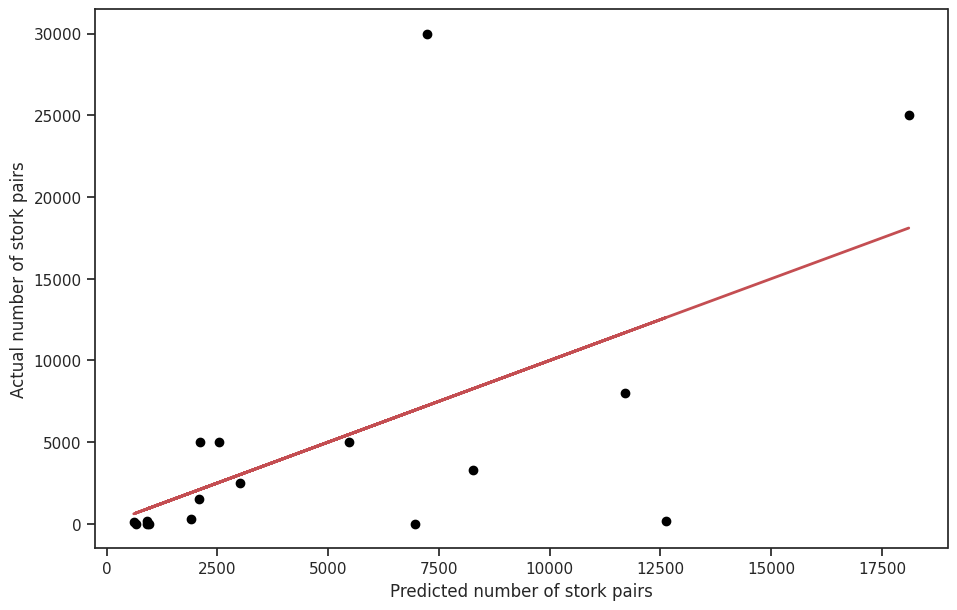

In [15]:
y_hat = reg.predict(X)

fig, a = plt.subplots(1,1,figsize=(11,7))
a.set_xlabel('Predicted number of stork pairs')
a.set_ylabel('Actual number of stork pairs')
a.scatter(y_hat, y, color='black')
a.plot(y_hat, y_hat, color='r', linewidth=2)
plt.show()

Model 1 doesn't appear to provide a very close fit with an R2 value of 0.336. It seems the models performance could increase a fair amount if the most extreme outlier of 30,000 stork pairs were removed.

### Section 3.2: Implementing Model 2

Population density is calculated by dividing the number of humans by the area, giving `PopulationDensity` (humans/km$^2$). The unit for `Humans` is first changed from 10$^6$ humans to individual humans to allow for easier interpretation of results.

The amount of useable land is calculated by taking the product of `Area` and `SuitableAreaPercent`, giving `UseableLand` (km$^2$).

In [16]:
storks = storks.assign(PopulationDensity = ((storks.Humans * 1000000) / storks.Area),
                       UseableLand = storks.Area * storks.SuitableAreaPercent / 100)
storks

,Country,Area,Storks,Humans,BirthRate,SuitableAreaPercent,PopulationDensity,UseableLand
0,Albania,28750,100,3.2,83,55.68,111.304348,16008.000
1,Austria,83860,300,7.6,87,38.34,90.627236,32151.924
2,Belgium,30520,1,9.9,118,65.93,324.377457,20121.836
3,Bulgaria,111000,5000,9.0,117,57.99,81.081081,64368.900
4,Denmark,43100,9,5.1,59,81.46,118.329466,35109.260
5,France,544000,140,56.0,774,58.47,102.941176,318076.800
6,Germany,357000,3300,78.0,901,59.81,218.487395,213521.700
7,Greece,132000,2500,10.0,106,47.31,75.757576,62449.200
8,Holland,41900,4,15.0,188,70.96,357.995227,29732.240
9,Hungary,93000,5000,11.0,124,75.86,118.279570,70549.800


The second model is now implemented:

In [17]:
X = np.column_stack((storks.PopulationDensity, storks.UseableLand))
reg = LinearRegression().fit(X, y)
print('The R2 coefficient of determination is %4.3f and R is %4.3f' %
      (reg.score(X, y), np.sqrt(reg.score(X, y))))
print('The intercept is %4.1f' % reg.intercept_)
beta_PopulationDensity, beta_UseableLand = reg.coef_
print("The regression coefficient for PopulationDensity is %.3f" % beta_PopulationDensity, "change of number of stork pairs per humans/km2.")
print("The regression coefficient for UseableLand is %.3f" % beta_UseableLand, "change of number of stork pairs per km2.")

The R2 coefficient of determination is 0.393 and R is 0.627
The intercept is 1881.4
The regression coefficient for PopulationDensity is -12.133 change of number of stork pairs per humans/km2.
The regression coefficient for UseableLand is 0.037 change of number of stork pairs per km2.


Another scatter graph can be plotted for model 2:

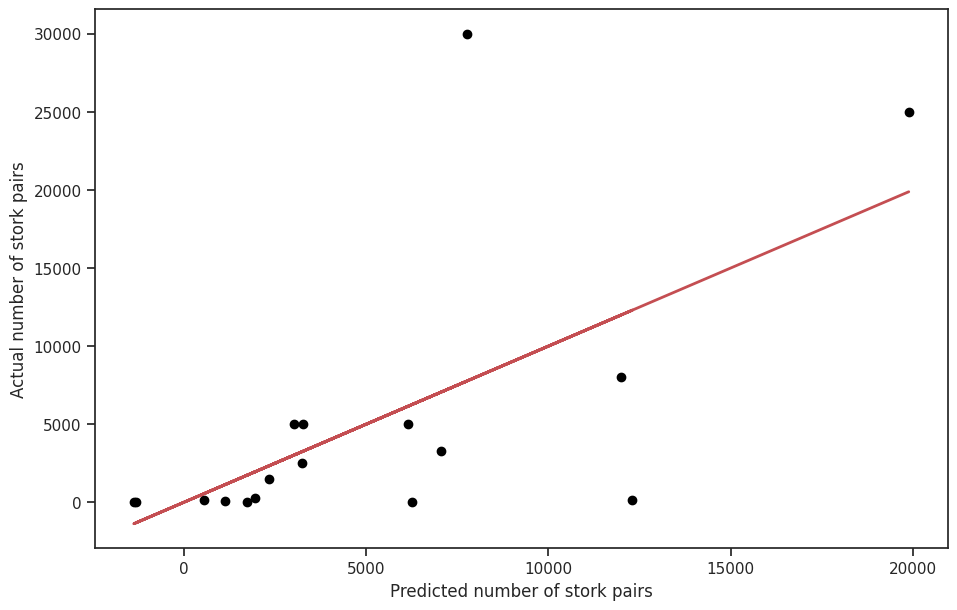

In [18]:
y_hat = reg.predict(X)

fig, a = plt.subplots(1,1,figsize=(11,7))
a.set_xlabel('Predicted number of stork pairs')
a.set_ylabel('Actual number of stork pairs')
a.scatter(y_hat, y, color='black')
a.plot(y_hat, y_hat, color='r', linewidth=2)
plt.show()

The results of model 2 provide a slightly closer fit than model 1. The R2 value is 0.393 which is slightly better than model 1. Again, the 30,000 stork pair appears as an extreme outlier.

### Section 3.3: Using Bootstrap for RMSE Differences

In [19]:
from sklearn.metrics import mean_squared_error

The RMSE for the difference between actual and predicted values is calculated below for both models. The difference between the two models RMSE values is calculated for each bootstrap sample. The distribution of these differences is then plotted.

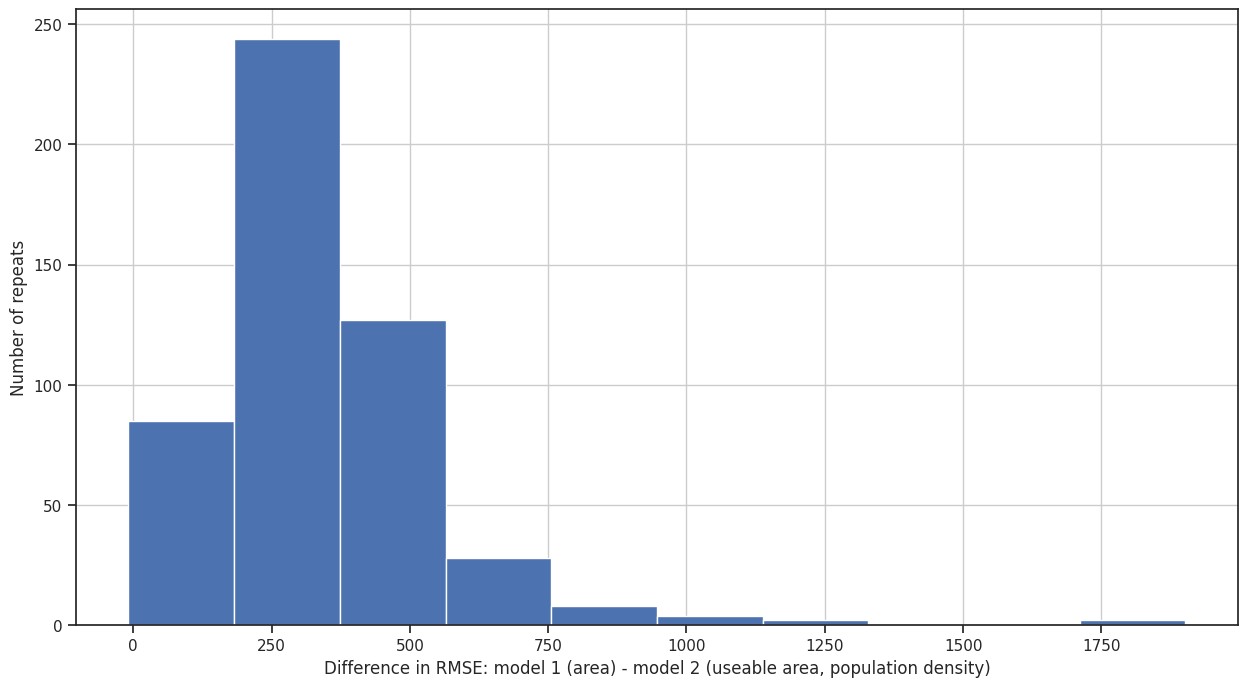

In [20]:
def regression2(df):
    y = df.Storks

    X1 = np.array([df.Area], ndmin=2)
    X1 = np.transpose(X1)
    reg1 = LinearRegression().fit(X1, y)
    y_hat1 = reg1.predict(X1)

    X2 = np.column_stack((df.PopulationDensity, df.UseableLand))
    reg2 = LinearRegression().fit(X2, y)
    y_hat2 = reg2.predict(X2)

    RMSE_diff = mean_squared_error(y, y_hat1, squared=False) - mean_squared_error(y, y_hat2, squared=False)
    return RMSE_diff

fig, a1 = plt.subplots(figsize=(15,8))
bstrap = bootstrapC(storks, ['RMSEDifference'], 500, regression2)
bstrap.hist(ax=a1)
a1.set_xlabel('Difference in RMSE: model 1 (area) - model 2 (useable area, population density)')
a1.set_ylabel('Number of repeats')
a1.set_title('')
plt.show()

The confidence intervals are estimated:

In [21]:
RMSE_diff = regression2(storks)

print("The difference between the RMSE (model 1 - model 2) is %3.0f, with 80%% CI from %3.0f to %3.0f" %
       (RMSE_diff, bstrap.RMSEDifference.quantile(0.1), bstrap.RMSEDifference.quantile(0.9)))
print("The difference between the RMSE (model 1 - model 2) is %3.0f, with 90%% CI from %3.0f to %3.0f" %
       (RMSE_diff, bstrap.RMSEDifference.quantile(0.05), bstrap.RMSEDifference.quantile(0.95)))
print("The difference between the RMSE (model 1 - model 2) is %3.0f, with 99%% CI from %3.0f to %3.0f" %
       (RMSE_diff, bstrap.RMSEDifference.quantile(0.005), bstrap.RMSEDifference.quantile(0.995)))

The difference between the RMSE (model 1 - model 2) is 308, with 80% CI from 148 to 556
The difference between the RMSE (model 1 - model 2) is 308, with 90% CI from 113 to 654
The difference between the RMSE (model 1 - model 2) is 308, with 99% CI from  19 to 1268


From these results, model 2 is seen to have better predictions for stork numbers than model 1 most of the time. This is because the RMSE is usually positive meaning the RMSE in model 1 was higher. For example, the upper bound for the 90% CI is much higher than the lower bound which means more of the bootstrap repeats were positive differences. Since none of the bounds for the confidence intervals cross 0, we can have confidence at 99% CI that model 2 is an improvement over model 1.